<a href="https://colab.research.google.com/github/RiccoSoares/AI-practising/blob/master/housePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Dataset

In [80]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Reading and displaying the dataset

In [62]:
train_filepath = "./train.csv"
train_data = pd.read_csv(train_filepath)

In [63]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [64]:
x_train_data = train_data.iloc[:,:-1]
y_train_data = train_data.iloc[:,-1:]

In [65]:
print("X train data shape:", x_train_data.shape)
print("Y train data shape:", y_train_data.shape)

X train data shape: (1460, 80)
Y train data shape: (1460, 1)


## Train-Validation Split

In [66]:
x_train, x_validation, y_train, y_validation = sklearn.model_selection.train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=1)

In [67]:
print("X Train data shape:", x_train.shape)
print("Y Train data shape:", y_train.shape)
print("X Validation data shape:", x_validation.shape)
print("Y Validation data shape:", y_validation.shape)

X Train data shape: (1168, 80)
Y Train data shape: (1168, 1)
X Validation data shape: (292, 80)
Y Validation data shape: (292, 1)


In [68]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
921,922,90,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
401,402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,New,Partial
280,281,60,RL,82.0,11287,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal
1401,1402,60,RL,62.0,7415,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal


## Data Pre-Processing

### Dealing With Missing Values

Analysing Missing Values

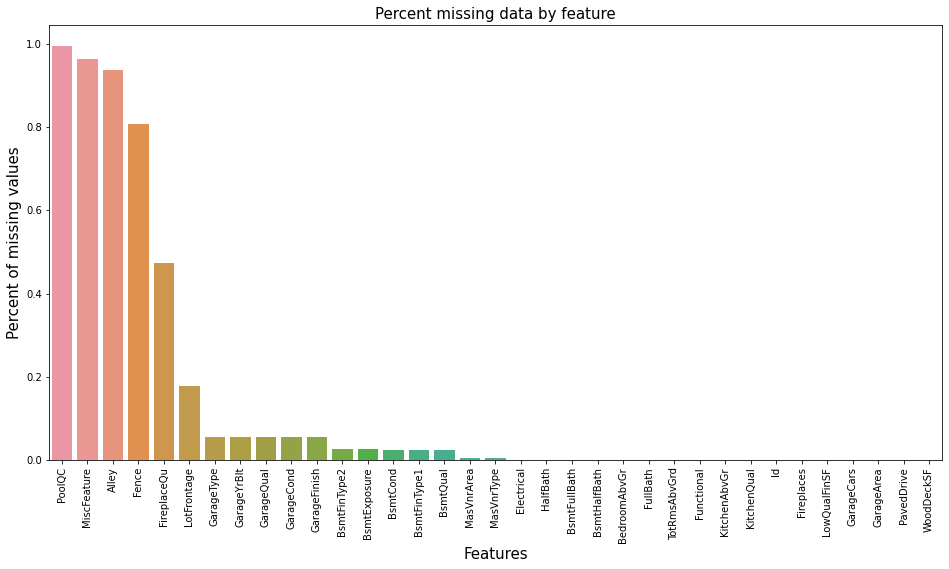

In [69]:
# Visualize missing values
total = x_train_data.isnull().sum().sort_values(ascending=False)
percent = (x_train_data.isnull().sum()/x_train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

missing_data=missing_data.head(35)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.title('Percent missing data by feature', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.show()

Cleaning Missing Values

In [70]:
# Splitting numerical and categorical features
numeric_features = x_train_data.dtypes[x_train_data.dtypes != "object"].index
categoric_features = x_train_data.dtypes[x_train_data.dtypes == "object"].index

# Getting features with missing values
na_numeric_features = [k for k, v in x_train_data[numeric_features].isnull().sum().to_dict().items() if v > 0]
na_categoric_features = [k for k, v in x_train_data[categoric_features].isnull().sum().to_dict().items() if v > 0]

In [71]:
imputer = SimpleImputer(strategy="mean")
x_train[na_numeric_features] = imputer.fit_transform(x_train[na_numeric_features])
x_validation[na_numeric_features] = imputer.transform(x_validation[na_numeric_features])

In [72]:
# Cleaning categorical features with missing values
for feature in na_categoric_features:
    x_train[feature].fillna("Missing", inplace=True)
    x_validation[feature].fillna("Missing", inplace=True)

Verifying the Missing Values replacement

In [73]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
921,922,90,RL,67.0,8777,Pave,Missing,Reg,Lvl,AllPub,...,0,0,Missing,GdPrv,Missing,0,9,2008,WD,Normal
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,8,2008,WD,Normal
401,402,20,RL,65.0,8767,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,7,2006,New,Partial
280,281,60,RL,82.0,11287,Pave,Missing,Reg,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,1,2007,WD,Normal
1401,1402,60,RL,62.0,7415,Pave,Missing,IR1,Lvl,AllPub,...,0,0,Missing,Missing,Missing,0,4,2008,WD,Normal


### Dealing With Categorical Variables

In [75]:
#converting categorical variables to numbers with OneHotEncoder
for feature in categoric_features:
  oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
  x_train[feature] = oh_encoder.fit_transform(x_train[feature].values.reshape(-1, 1))
  x_validation[feature] = oh_encoder.transform(x_validation[feature].values.reshape(-1, 1))

In [76]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
921,922,90,0.0,67.0,8777,0.0,0.0,0.0,0.0,1.0,...,0,0,0.0,1.0,0.0,0,9,2008,0.0,0.0
520,521,190,0.0,60.0,10800,0.0,1.0,0.0,0.0,1.0,...,0,0,0.0,0.0,0.0,0,8,2008,0.0,0.0
401,402,20,0.0,65.0,8767,0.0,0.0,1.0,0.0,1.0,...,0,0,0.0,0.0,0.0,0,7,2006,0.0,0.0
280,281,60,0.0,82.0,11287,0.0,0.0,0.0,0.0,1.0,...,0,0,0.0,0.0,0.0,0,1,2007,0.0,0.0
1401,1402,60,0.0,62.0,7415,0.0,0.0,1.0,0.0,1.0,...,0,0,0.0,0.0,0.0,0,4,2008,0.0,0.0


## Fitting a Decision Tree Classifier

In [77]:
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [78]:
y_train_pred = model.predict(x_train)
y_validation_pred = model.predict(x_validation)

In [81]:
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Validation Set Accuracy:", metrics.accuracy_score(y_validation, y_validation_pred))

Training Set Accuracy: 1.0
Validation Set Accuracy: 0.010273972602739725
